# Summary Statistics

In [23]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.cluster import KMeans


file_path = '/Users/rakibul/Desktop/uni koblenz/winter 202324/Research Lab/code/models/trainn.csv'
data = pd.read_csv(file_path)

### Missing values

Missing Values:
     sudden_fever  headache  mouth_bleed  nose_bleed  muscle_pain  joint_pain  \
0           False     False        False       False        False       False   
1           False     False        False       False        False       False   
2           False     False        False       False        False       False   
3           False     False        False       False        False       False   
4           False     False        False       False        False       False   
..            ...       ...          ...         ...          ...         ...   
247         False     False        False       False        False       False   
248         False     False        False       False        False       False   
249         False     False        False       False        False       False   
250         False     False        False       False        False       False   
251         False     False        False       False        False       False   

     vomiti

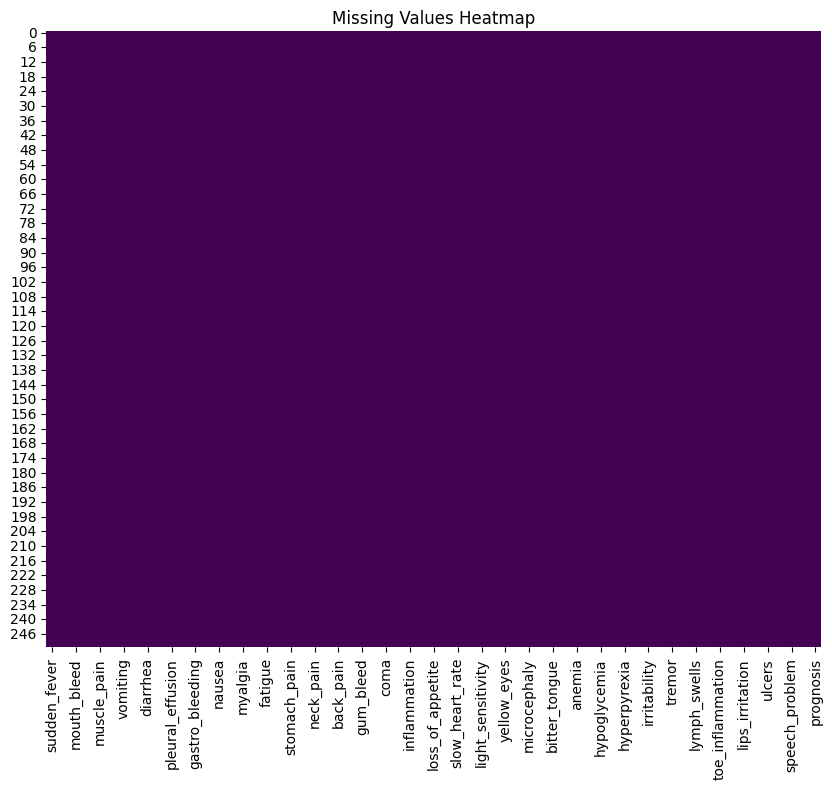

In [24]:
# Identify missing values
missing_values = data.isnull()

# Display missing values
print("Missing Values:")
print(missing_values)

# Summarize missing values for each column
missing_summary = data.isnull().sum()
print("\nMissing Values Summary:")
print(missing_summary)

# Display columns with missing values and their count
columns_with_missing = missing_summary[missing_summary > 0]
print("\nColumns with Missing Values:")
print(columns_with_missing)

# Optionally, visualize missing values using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


### duplicates

In [25]:
# Identify duplicate rows
duplicates = data.duplicated()

# Display duplicate rows
duplicate_rows = data[duplicates]
print("Duplicate Rows:")
print(duplicate_rows)

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Optionally, display the indices of the duplicate rows
duplicate_indices = data[duplicates].index
print("Indices of duplicate rows:")
print(duplicate_indices.tolist())


# Function to find duplicate columns
def find_duplicate_columns(df):
    duplicates = {}
    cols = df.columns
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            if df[cols[i]].equals(df[cols[j]]):
                if cols[i] not in duplicates:
                    duplicates[cols[i]] = [cols[j]]
                else:
                    duplicates[cols[i]].append(cols[j])
    return duplicates

# Identify duplicate columns
duplicate_columns = find_duplicate_columns(data)

# Display duplicate columns
print("Duplicate Columns:")
for col, dups in duplicate_columns.items():
    print(f"{col}: {dups}")

Duplicate Rows:
Empty DataFrame
Columns: [sudden_fever, headache, mouth_bleed, nose_bleed, muscle_pain, joint_pain, vomiting, rash, diarrhea, hypotension, pleural_effusion, ascites, gastro_bleeding, swelling, nausea, chills, myalgia, digestion_trouble, fatigue, skin_lesions, stomach_pain, orbital_pain, neck_pain, weakness, back_pain, weight_loss, gum_bleed, jaundice, coma, diziness, inflammation, red_eyes, loss_of_appetite, urination_loss, slow_heart_rate, abdominal_pain, light_sensitivity, yellow_skin, yellow_eyes, facial_distortion, microcephaly, rigor, bitter_tongue, convulsion, anemia, cocacola_urine, hypoglycemia, prostraction, hyperpyrexia, stiff_neck, irritability, confusion, tremor, paralysis, lymph_swells, breathing_restriction, toe_inflammation, finger_inflammation, lips_irritation, itchiness, ulcers, toenail_loss, speech_problem, bullseye_rash, prognosis]
Index: []

[0 rows x 65 columns]
Number of duplicate rows: 0
Indices of duplicate rows:
[]
Duplicate Columns:


#### for symptoms


Summary Statistics for Symptoms:
       sudden_fever    headache  mouth_bleed  nose_bleed  muscle_pain  \
count    252.000000  252.000000   252.000000  252.000000   252.000000   
mean       0.515873    0.460317     0.519841    0.547619     0.519841   
std        0.500743    0.499415     0.500600    0.498718     0.500600   
min        0.000000    0.000000     0.000000    0.000000     0.000000   
25%        0.000000    0.000000     0.000000    0.000000     0.000000   
50%        1.000000    0.000000     1.000000    1.000000     1.000000   
75%        1.000000    1.000000     1.000000    1.000000     1.000000   
max        1.000000    1.000000     1.000000    1.000000     1.000000   

       joint_pain    vomiting        rash    diarrhea  hypotension  ...  \
count  252.000000  252.000000  252.000000  252.000000   252.000000  ...   
mean     0.503968    0.480159    0.496032    0.452381     0.468254  ...   
std      0.500979    0.500600    0.500979    0.498718     0.499984  ...   
min     

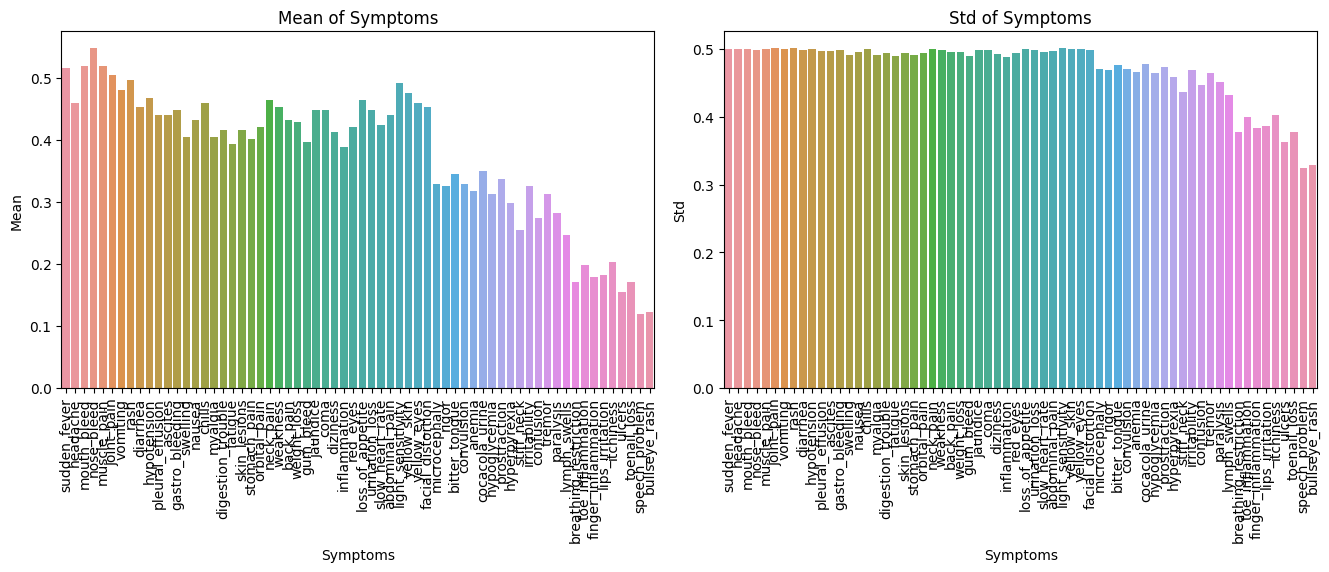

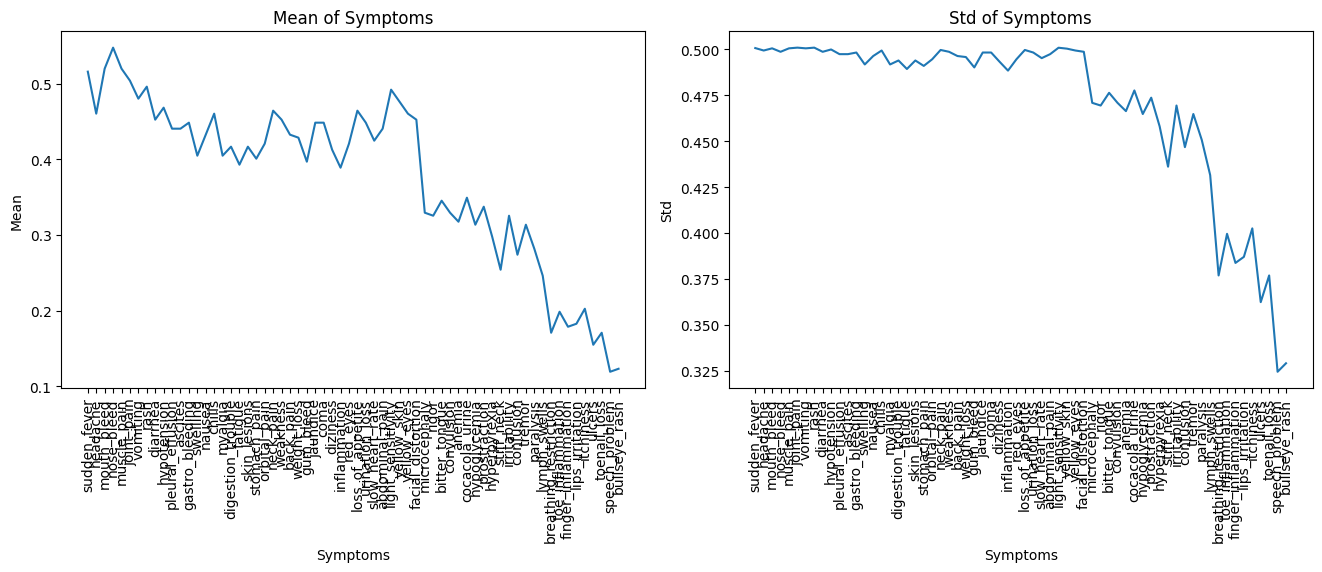

In [26]:
# Calculate summary statistics for symptoms
symptoms_summary = data.drop(columns=['prognosis']).describe()

# Print summary statistics for symptoms
print("\nSummary Statistics for Symptoms:")
print(symptoms_summary)

# Prepare the data for visualization
summary_stats = symptoms_summary.loc[['mean', 'std']].T

# List of statistics to plot
stats_to_plot = ['mean', 'std']

# Plot each statistic in a separate subplot within a grid layout
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
axs = axs.flatten()

for i, stat in enumerate(stats_to_plot):
    sns.barplot(x=summary_stats.index, y=summary_stats[stat], ax=axs[i])
    axs[i].set_title(f'{stat.capitalize()} of Symptoms')
    axs[i].set_ylabel(stat.capitalize())
    axs[i].set_xlabel('Symptoms')
    axs[i].tick_params(axis='x', rotation=90)

# Hide any unused subplots
for j in range(len(stats_to_plot), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# Plot each statistic in a separate subplot within a linegraph layout
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
axs = axs.flatten()

for i, stat in enumerate(stats_to_plot):
    
    sns.lineplot(x=summary_stats.index, y=summary_stats[stat], ax=axs[i])
    axs[i].set_title(f'{stat.capitalize()} of Symptoms')
    axs[i].set_ylabel(stat.capitalize())
    axs[i].set_xlabel('Symptoms')
    axs[i].tick_params(axis='x', rotation=90)

# Hide any unused subplots
for j in range(len(stats_to_plot), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

#### for diseases

In [27]:
# Calculate summary statistics for diseases
diseases_summary = data.groupby('prognosis').describe()

# Print summary statistics for diseases
print("\nSummary Statistics for Diseases:")
print(diseases_summary)


Summary Statistics for Diseases:
                      sudden_fever                                          \
                             count      mean       std  min  25%  50%  75%   
prognosis                                                                    
Chikungunya                   23.0  0.608696  0.499011  0.0  0.0  1.0  1.0   
Dengue                        23.0  0.782609  0.421741  0.0  1.0  1.0  1.0   
Japanese encephalitis         23.0  0.521739  0.510754  0.0  0.0  1.0  1.0   
Lyme disease                  22.0  0.545455  0.509647  0.0  0.0  1.0  1.0   
Malaria                       23.0  0.695652  0.470472  0.0  0.0  1.0  1.0   
Plague                        23.0  0.782609  0.421741  0.0  1.0  1.0  1.0   
Rift Valley fever             23.0  0.434783  0.506870  0.0  0.0  0.0  1.0   
Tungiasis                     23.0  0.086957  0.288104  0.0  0.0  0.0  0.0   
West Nile fever               23.0  0.521739  0.510754  0.0  0.0  1.0  1.0   
Yellow Fever                  

# Symptom Distribution

In [28]:
# Calculate symptom distribution
symptom_distribution = data.drop(columns=['prognosis']).sum().sort_values(ascending=False)

# Print symptom distribution
print("Symptom Distribution:")
print(symptom_distribution)


Symptom Distribution:
nose_bleed               138
mouth_bleed              131
muscle_pain              131
sudden_fever             130
joint_pain               127
                        ... 
breathing_restriction     43
toenail_loss              43
ulcers                    39
bullseye_rash             31
speech_problem            30
Length: 64, dtype: int64


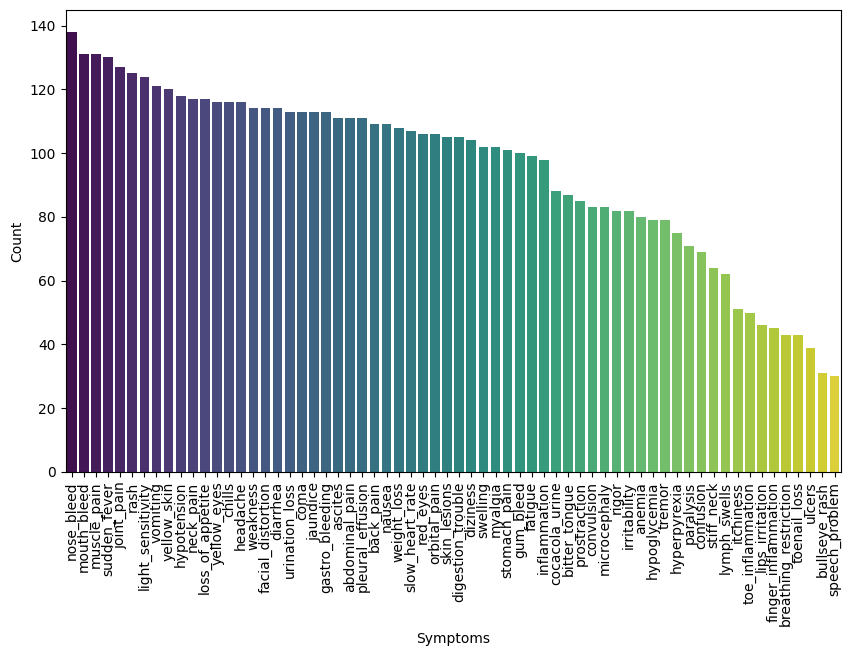

In [29]:
# Visualize symptom distribution            

# Convert the symptom distribution to a DataFrame for easier plotting
symptom_distribution_df = symptom_distribution.reset_index()
symptom_distribution_df.columns = ['Symptom', 'Count']

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Symptom', y='Count', data=symptom_distribution_df, palette='viridis')
plt.xticks(rotation=90)
# plt.title('Symptom Distribution')
plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.show()

# KDE plot (if desired)
#plt.figure(figsize=(10, 6))
#sns.kdeplot(symptom_distribution, bw_adjust=0.5)
# plt.title('Density Plot of Symptom Distribution')
#plt.xlabel('Symptom Count')
#plt.ylabel('Density')
#plt.show()


# Disease Distribution

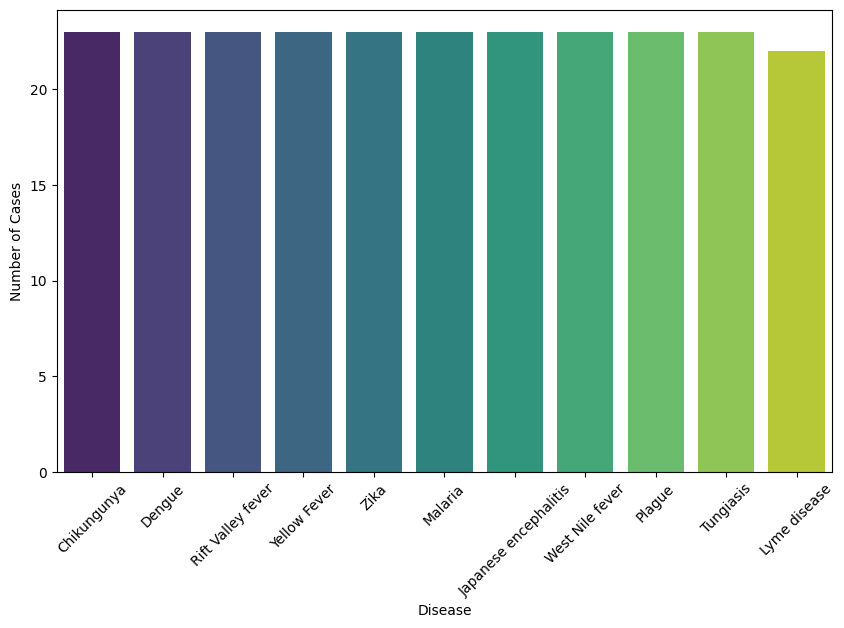

Total number of cases: 252
Most common diseases:
             Disease  Number of Cases
0        Chikungunya               23
1             Dengue               23
2  Rift Valley fever               23
3       Yellow Fever               23
4               Zika               23


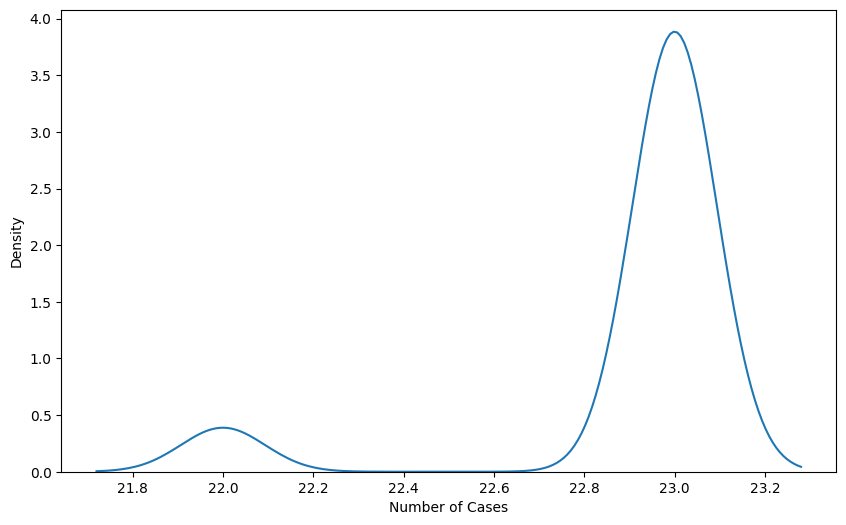

In [30]:
# Count the occurrences of each disease
disease_counts = data['prognosis'].value_counts().reset_index()
disease_counts.columns = ['Disease', 'Number of Cases']

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Disease', y='Number of Cases', data=disease_counts, palette='viridis')
#plt.title('Distribution of Diseases')
plt.xlabel('Disease')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

# Print summary statistics
print("Total number of cases:", len(data))
print("Most common diseases:")
print(disease_counts.head())

# KDE plot (if desired)
disease_data = data['prognosis'].value_counts().values
plt.figure(figsize=(10, 6))
sns.kdeplot(disease_data, bw_adjust=0.5)
# plt.title('Density Plot of  Diseases')
plt.xlabel('Number of Cases')
plt.ylabel('Density')
plt.show()


# Symptom Co-occurrence

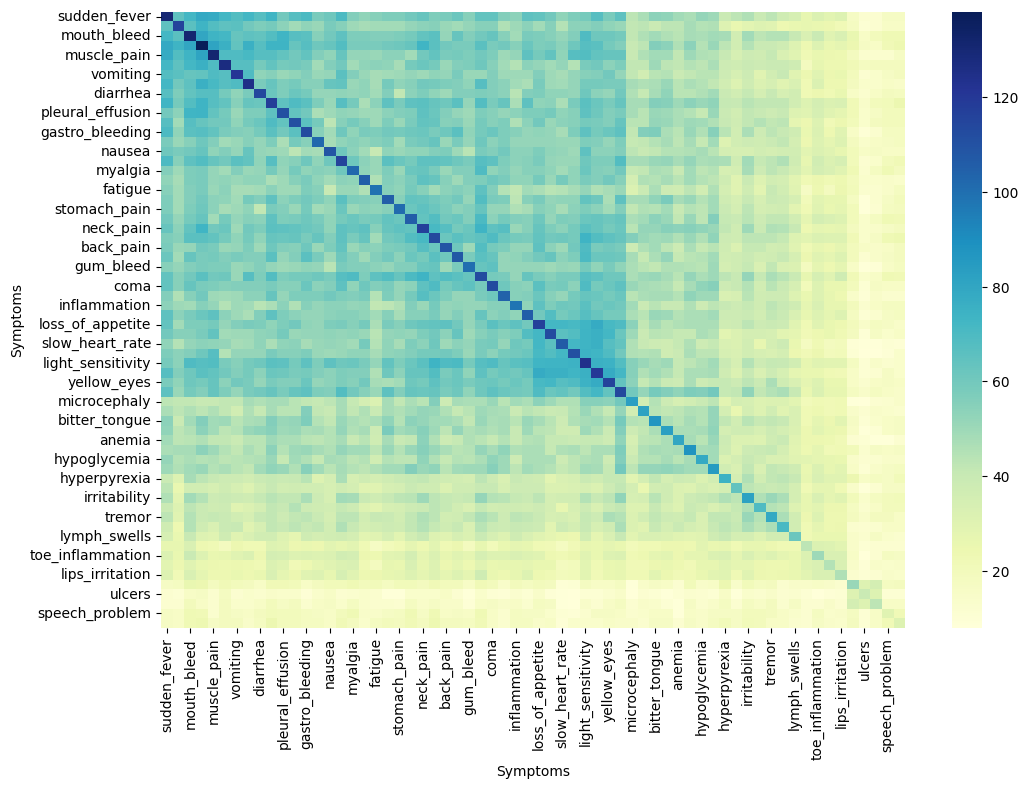

In [31]:
# Select only symptom columns
symptoms = data.drop([ 'prognosis'], axis=1)

# Calculate symptom co-occurrence matrix
co_occurrence_matrix = symptoms.T.dot(symptoms)

# Visualize the co-occurrence matrix
plt.figure(figsize=(12, 8))
sns.heatmap(co_occurrence_matrix, cmap="YlGnBu")
#plt.title('Symptom Co-occurrence Matrix')
plt.xlabel('Symptoms')
plt.ylabel('Symptoms')
plt.show()

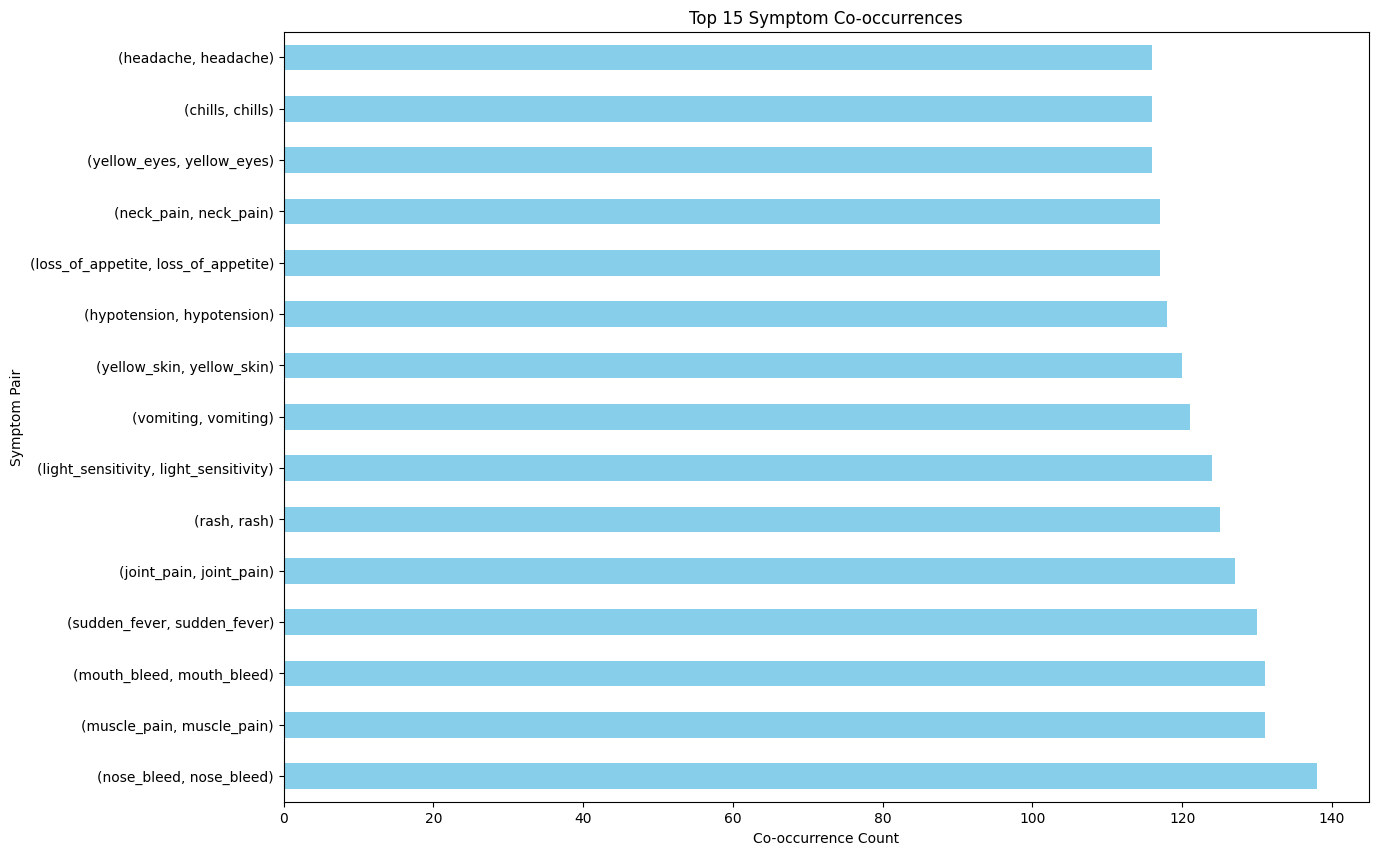

In [32]:
# Bar plot of most common symptom co-occurrences
plt.figure(figsize=(14, 10))
co_occurrence_matrix.unstack().sort_values(ascending=False).head(15).plot(kind='barh', color='skyblue')  # Changed kind to 'barh' for horizontal bar plot
plt.xlabel('Co-occurrence Count')  # Changed xlabel to Co-occurrence Count
plt.ylabel('Symptom Pair')  # Changed ylabel to Symptom Pair
plt.title('Top 15 Symptom Co-occurrences')  # Added title back
plt.show()


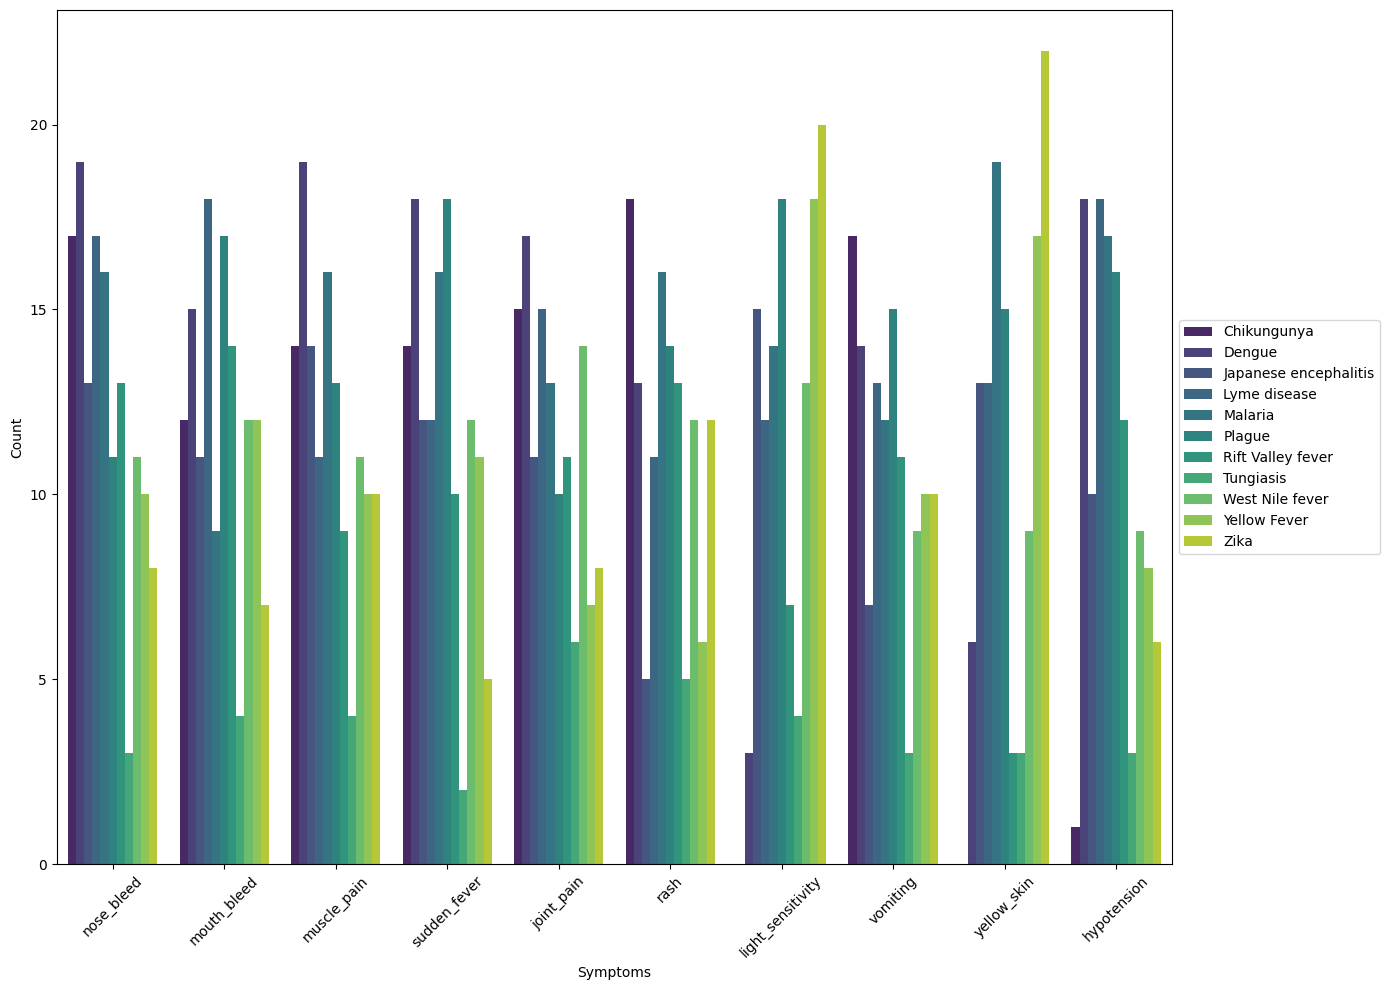

In [33]:
# Selecting all unique prognoses
all_prognosis = data['prognosis'].unique()

# Filtering data for all prognoses
all_prognosis_data = data[data['prognosis'].isin(all_prognosis)]

# Selecting the top 10 most frequent symptoms across all prognoses
top_10_symptoms = all_prognosis_data.drop([ 'prognosis'], axis=1).sum().sort_values(ascending=False).head(10).index.tolist()

# Filtering data for the top 10 symptoms
all_prognosis_data = all_prognosis_data[['prognosis'] + top_10_symptoms]

# Grouping data by prognosis and summing up symptom occurrences
grouped_data = all_prognosis_data.groupby('prognosis').sum()

# Plotting all prognosis and their top symptoms using a bar plot
plt.figure(figsize=(14, 10))
sns.barplot(data=grouped_data.reset_index().melt(id_vars='prognosis', var_name='Symptom', value_name='Count'),
            x='Symptom', y='Count', hue='prognosis', palette='viridis')

plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Prognosis')
# Add legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


# Dimensionality Reduction

In [34]:
# Select symptom columns
symptom_columns = data.columns[1:-1]  # Exclude 'id' and 'prognosis' columns
symptom_data = data[symptom_columns]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(symptom_data)



# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['prognosis'] = data['prognosis']



# Perform K-Means Clustering
kmeans = KMeans(n_clusters=11)  # Number of clusters can be tuned
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the DataFrame
pca_df['Cluster'] = clusters

/Users/rakibul/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


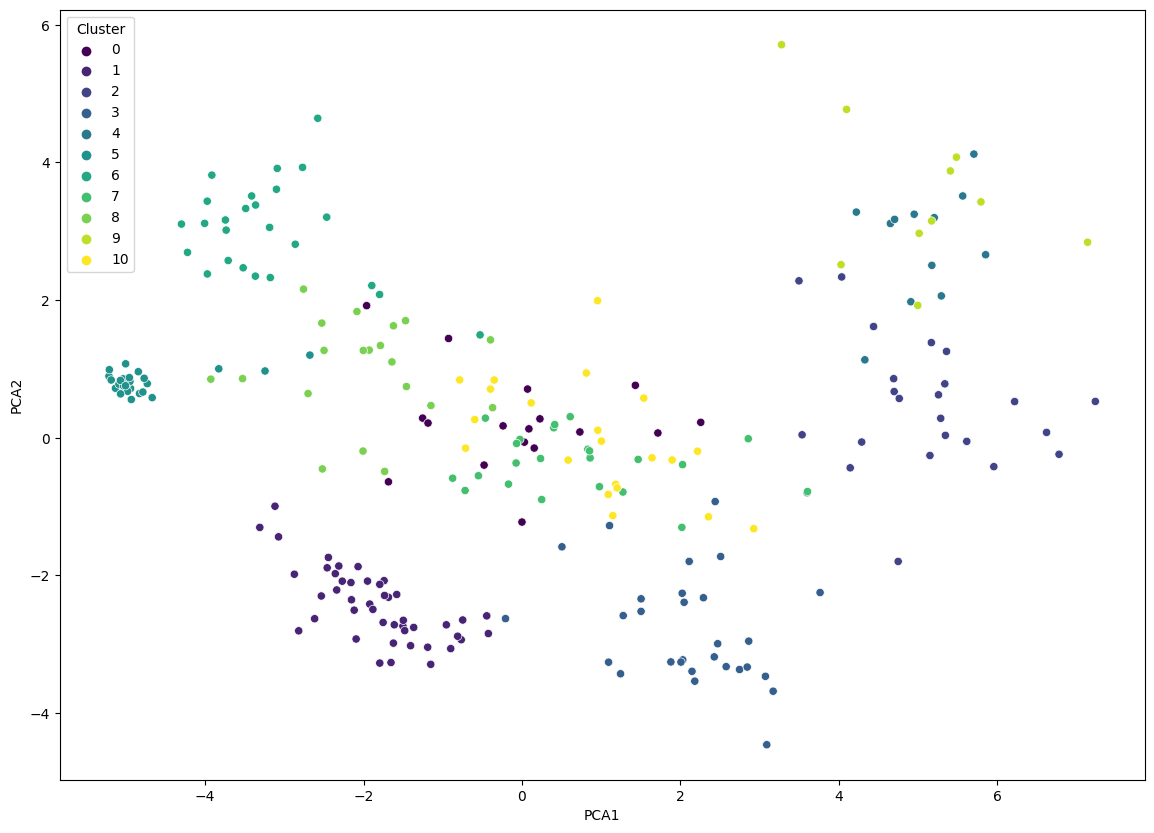

In [35]:
# Plot PCA results with clusters
plt.figure(figsize=(14, 10))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=pca_df, legend='full')
#plt.title('PCA of Symptoms with K-Means Clusters')
plt.show()

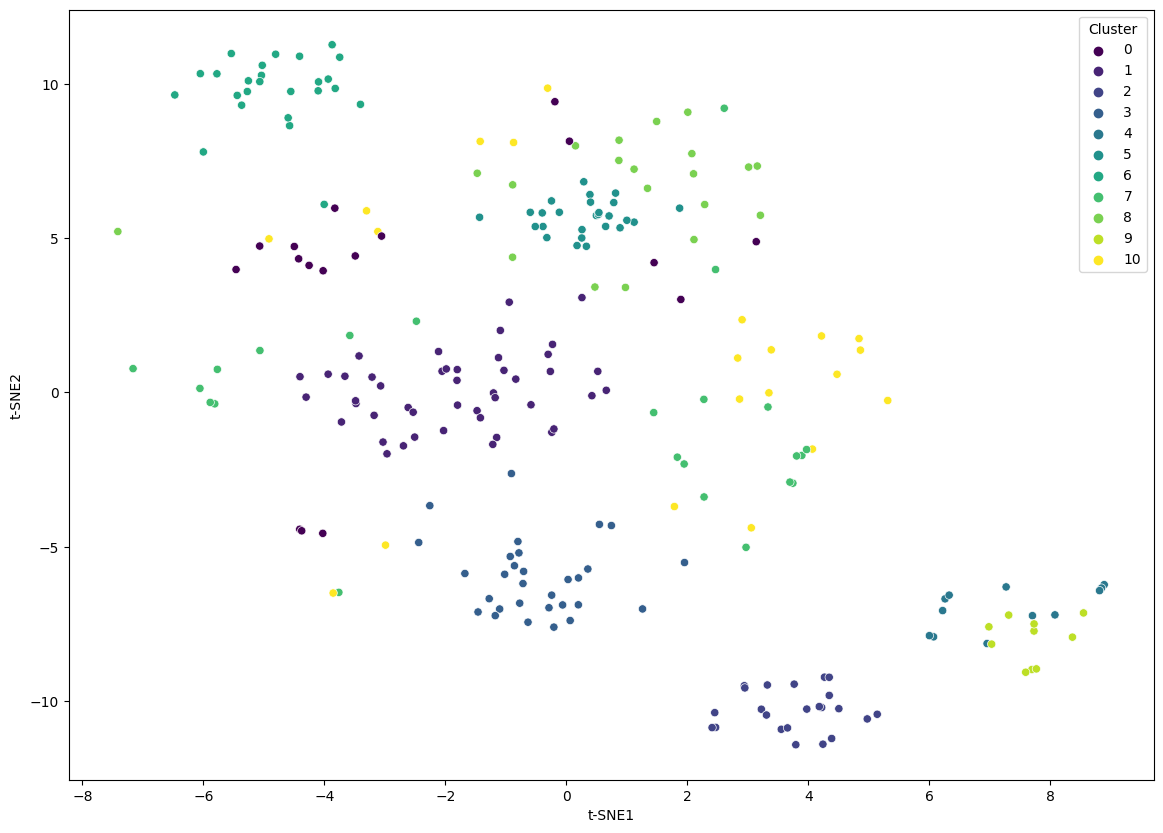

In [36]:


# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(scaled_data)

# Create a DataFrame with t-SNE results
tsne_df = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])
tsne_df['prognosis'] = data['prognosis']
tsne_df['Cluster'] = clusters

# Plot t-SNE results with clusters
plt.figure(figsize=(14, 10))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='Cluster', palette='viridis', data=tsne_df, legend='full')
#plt.title('t-SNE of Symptoms with K-Means Clusters')
plt.show()

# Outlier Detection

/var/folders/tk/7b7jqg510qs87gwrz4s9v7m80000gn/T/ipykernel_59629/718588466.py:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=z_scores.index, y=z_scores.max(axis=1), palette='viridis', label='Data')


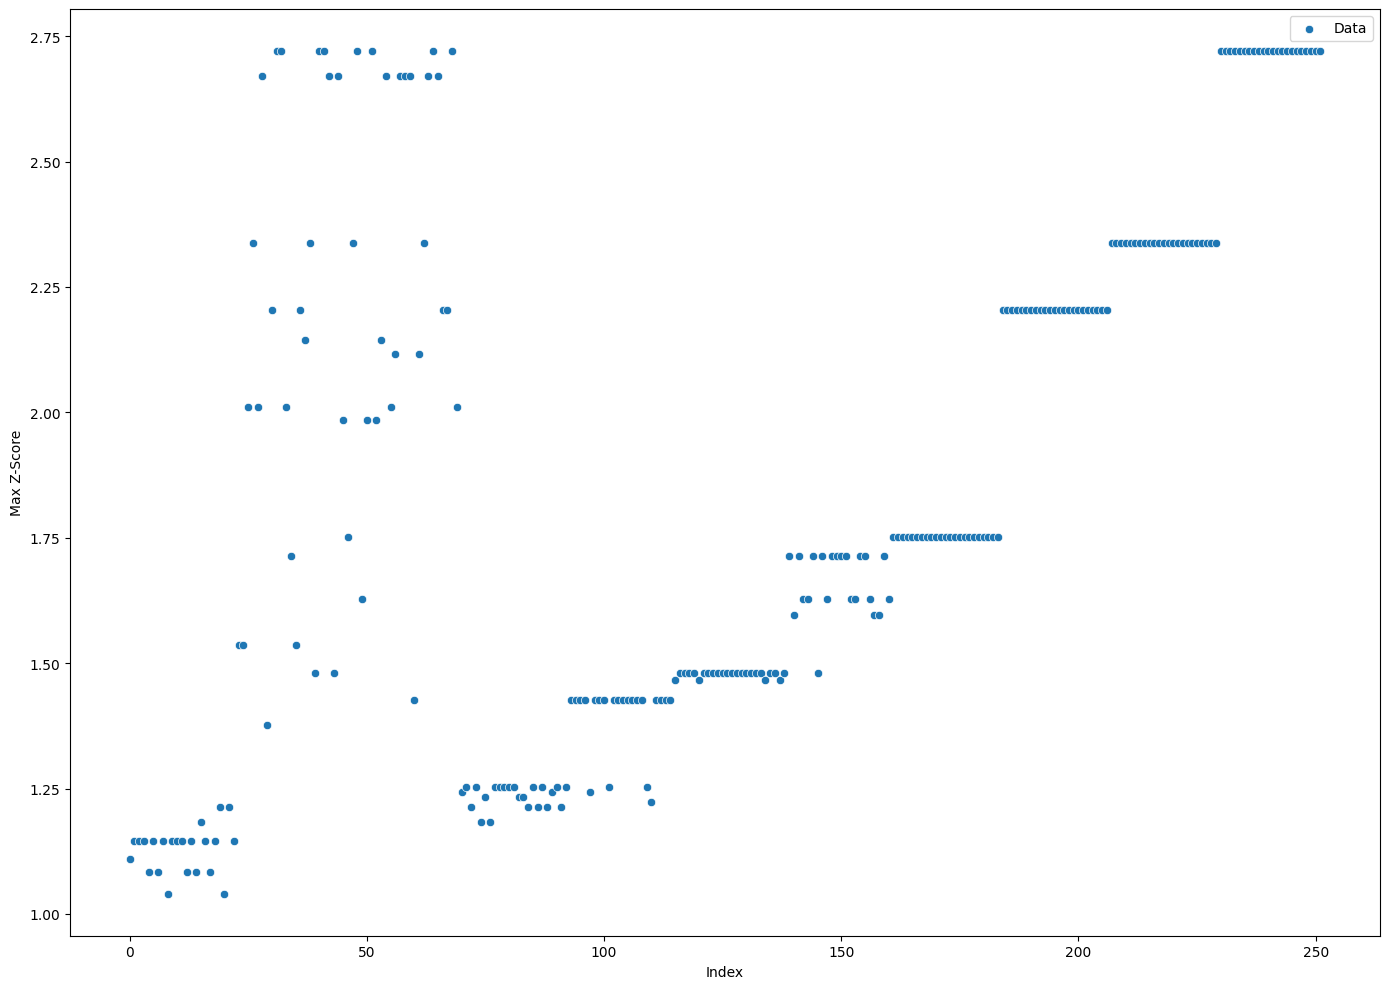

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame with symptoms as columns
symptoms = data.drop(['prognosis'], axis=1)

# Standardize the data
scaler = StandardScaler()
symptoms_scaled = scaler.fit_transform(symptoms)

# Outlier detection using Z-Score
z_scores = pd.DataFrame(symptoms_scaled, columns=symptoms.columns)
outliers_zscore = z_scores[(z_scores > 3).any(axis=1)]

# Print outliers found by Z-Score (if needed)
#print("Outliers found by Z-Score:")
#print(outliers_zscore)

# Plotting with Seaborn
plt.figure(figsize=(14, 10))

# Z-Score outliers plot
sns.scatterplot(x=z_scores.index, y=z_scores.max(axis=1), palette='viridis', label='Data')
sns.scatterplot(x=outliers_zscore.index, y=outliers_zscore.max(axis=1), color='red', label='Outliers')

# Customize the plot
plt.xlabel('Index')
plt.ylabel('Max Z-Score')
plt.legend()
plt.tight_layout()

plt.show()



Outliers found by DBSCAN:
[-1 -1 -1  0  1  2  3  2 -1  2 -1  2  1 -1  3 -1  0 -1  2 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


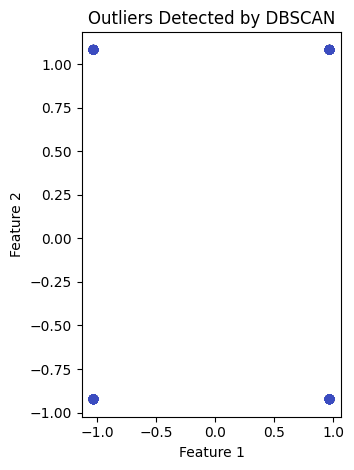

In [38]:
# Outlier detection using DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2)
outliers_dbscan = dbscan.fit_predict(symptoms_scaled)

# Print outliers found by DBSCAN
print("\nOutliers found by DBSCAN:")
print(outliers_dbscan)

# DBSCAN outliers
plt.subplot(1, 2, 2)
plt.scatter(symptoms_scaled[:, 0], symptoms_scaled[:, 1], c=outliers_dbscan, cmap='coolwarm')
plt.title('Outliers Detected by DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

### Histogram with Z-Score Overlay

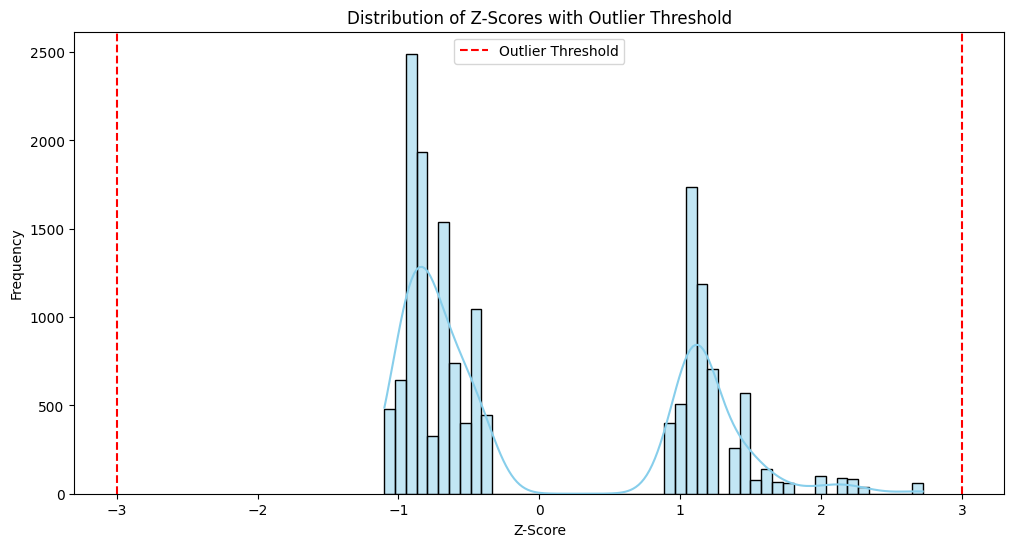

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming z_scores is your DataFrame with Z-scores
z_scores_melted = z_scores.melt(var_name='Symptom', value_name='Z-Score')

plt.figure(figsize=(12, 6))
sns.histplot(z_scores_melted['Z-Score'], bins=50, kde=True, color='skyblue')
plt.axvline(x=3, color='red', linestyle='--', label='Outlier Threshold')
plt.axvline(x=-3, color='red', linestyle='--')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Z-Scores with Outlier Threshold')
plt.show()


### Box Plot

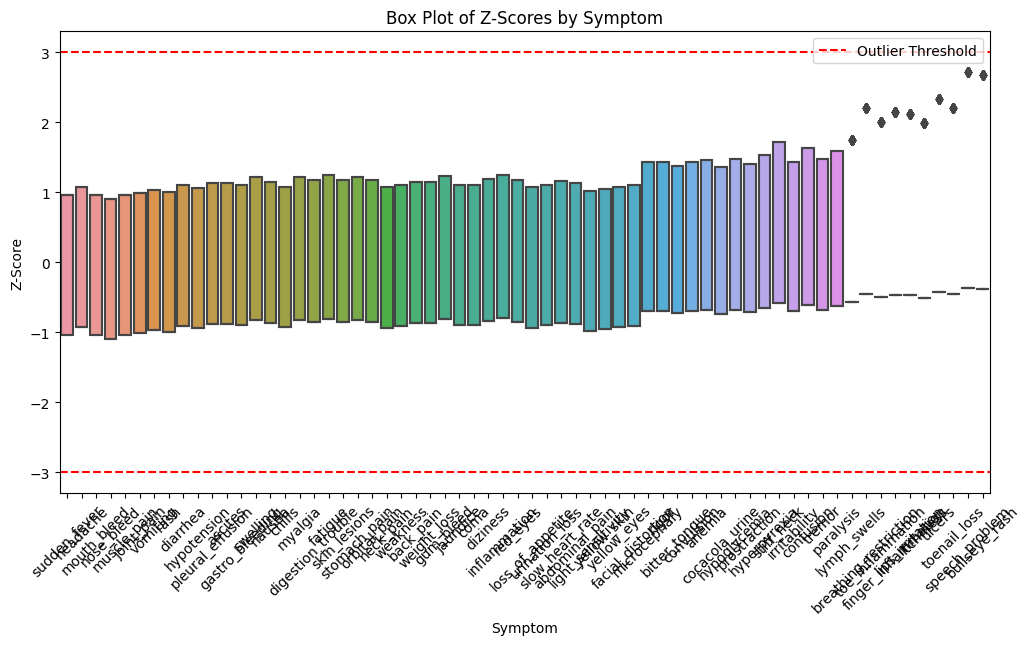

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=z_scores_melted, x='Symptom', y='Z-Score')
plt.axhline(y=3, color='red', linestyle='--', label='Outlier Threshold')
plt.axhline(y=-3, color='red', linestyle='--')
plt.xticks(rotation=45)
plt.xlabel('Symptom')
plt.ylabel('Z-Score')
plt.legend()
plt.title('Box Plot of Z-Scores by Symptom')
plt.show()


### Scatter Plot

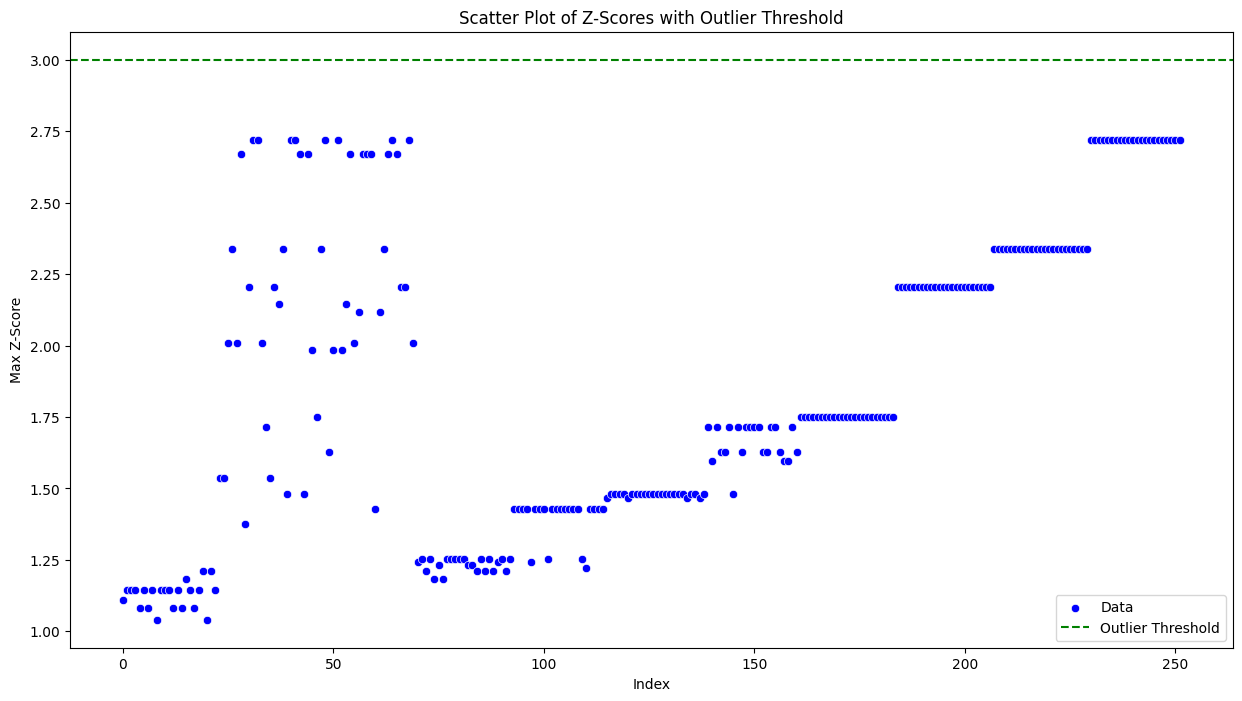

In [41]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=z_scores.index, y=z_scores.max(axis=1), color='blue', label='Data')
sns.scatterplot(x=outliers_zscore.index, y=outliers_zscore.max(axis=1), color='red', label='Outliers')
plt.xlabel('Index')
plt.ylabel('Max Z-Score')
plt.axhline(y=3, color='green', linestyle='--', label='Outlier Threshold')
plt.legend()
plt.title('Scatter Plot of Z-Scores with Outlier Threshold')
plt.show()


### Heatmap

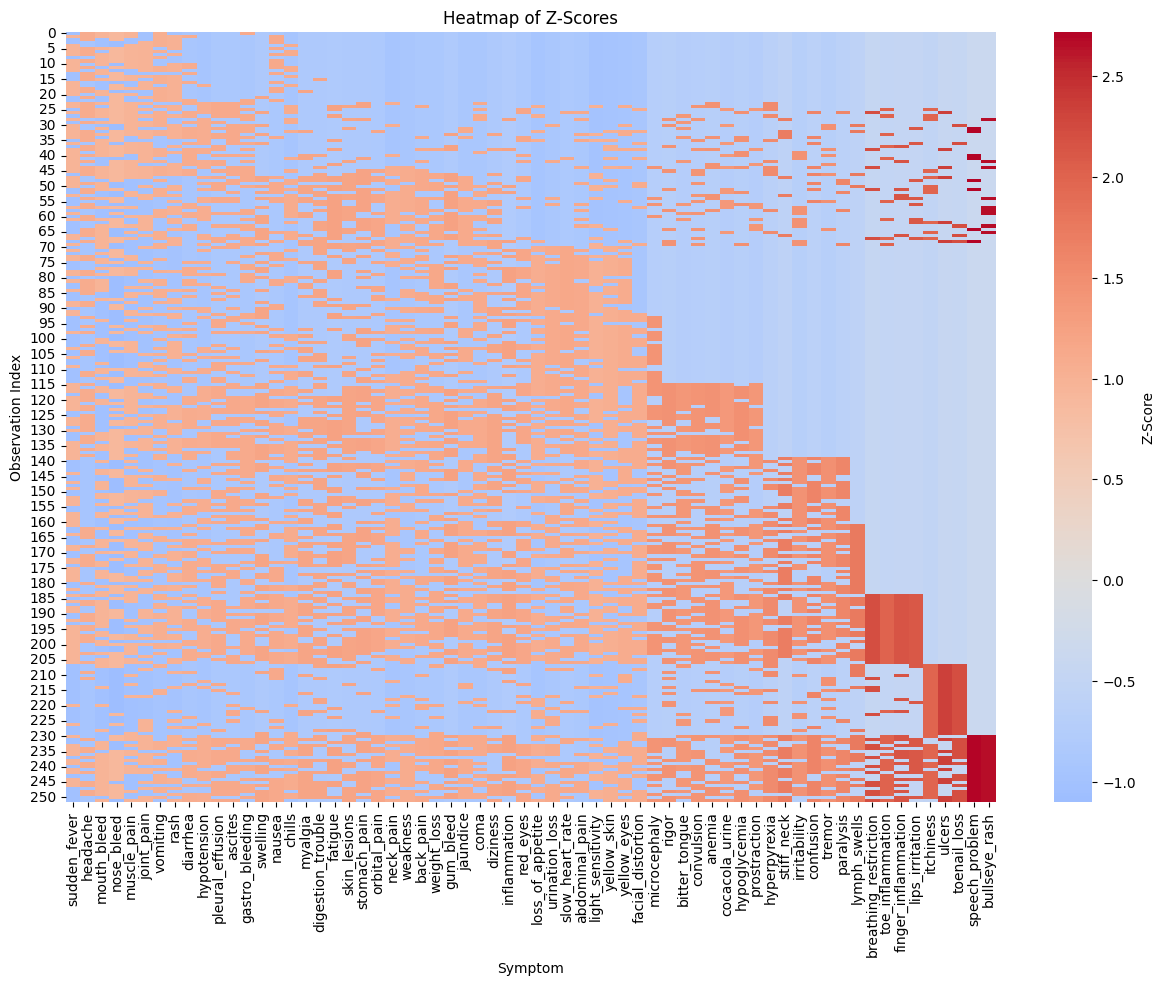

In [42]:
plt.figure(figsize=(15, 10))
sns.heatmap(z_scores, cmap='coolwarm', center=0, annot=False, cbar_kws={'label': 'Z-Score'})
plt.title('Heatmap of Z-Scores')
plt.xlabel('Symptom')
plt.ylabel('Observation Index')
plt.show()


### Pairplot

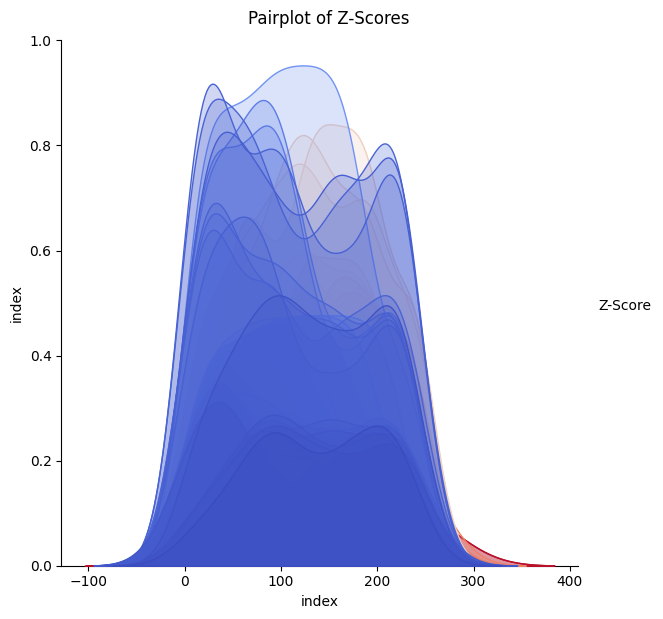

In [43]:
# Melt the z_scores DataFrame for use with pairplot
z_scores_reset = z_scores.reset_index().melt(id_vars='index', var_name='Symptom', value_name='Z-Score')
sns.pairplot(z_scores_reset, hue='Z-Score', palette='coolwarm', height=6)
plt.suptitle('Pairplot of Z-Scores', y=1.02)
plt.show()


# Class Imbalance

Class distribution before oversampling: Counter({'Chikungunya': 23, 'Dengue': 23, 'Rift Valley fever': 23, 'Yellow Fever': 23, 'Zika': 23, 'Malaria': 23, 'Japanese encephalitis': 23, 'West Nile fever': 23, 'Plague': 23, 'Tungiasis': 23, 'Lyme disease': 22})
Class distribution after oversampling: Counter({'Chikungunya': 23, 'Dengue': 23, 'Rift Valley fever': 23, 'Yellow Fever': 23, 'Zika': 23, 'Malaria': 23, 'Japanese encephalitis': 23, 'West Nile fever': 23, 'Plague': 23, 'Tungiasis': 23, 'Lyme disease': 23})


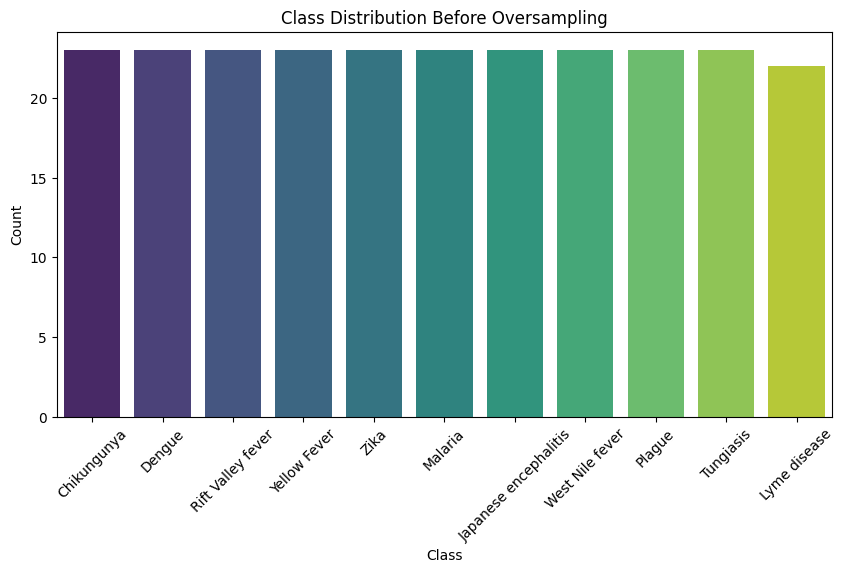

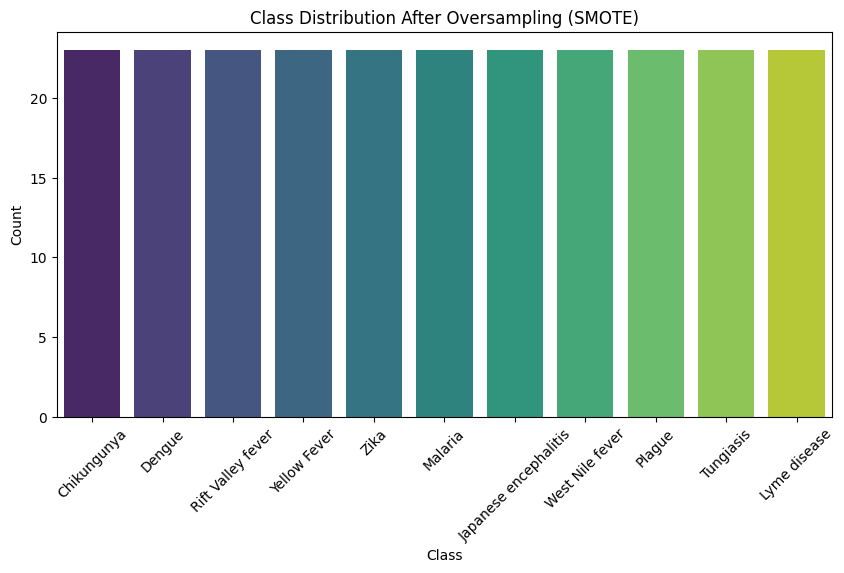

In [44]:

# Assuming 'data' is your DataFrame with symptoms as columns and 'prognosis' as the target variable
X = data.drop(['prognosis'], axis=1)
y = data['prognosis']

# Display class distribution before oversampling
print("Class distribution before oversampling:", Counter(y))

# Perform over-sampling using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))

# Prepare data for plotting class distribution before oversampling
class_distribution_before = Counter(y)
class_labels_before = list(class_distribution_before.keys())
class_counts_before = list(class_distribution_before.values())
class_distribution_df_before = pd.DataFrame({
    'Class': class_labels_before,
    'Count': class_counts_before
})

# Plot class distribution before oversampling using Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(data=class_distribution_df_before, x='Class', y='Count', palette='viridis')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Class Distribution Before Oversampling')
plt.show()

# Prepare data for plotting class distribution after oversampling
class_distribution_after = Counter(y_resampled)
class_labels_after = list(class_distribution_after.keys())
class_counts_after = list(class_distribution_after.values())
class_distribution_df_after = pd.DataFrame({
    'Class': class_labels_after,
    'Count': class_counts_after
})

# Plot class distribution after oversampling using Seaborn
plt.figure(figsize=(10, 5))
sns.barplot(data=class_distribution_df_after, x='Class', y='Count', palette='viridis')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Class Distribution After Oversampling (SMOTE)')
plt.show()
